In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Excercise 1. Logistic Regression

In [44]:
def load_data(file_name):
    data = np.array(pd.read_csv(file_name, header=None))
    np.random.shuffle(data)
    split_index = int(len(data)*0.8)
    X_train, y_train = data[0:split_index,0:-1], data[0:split_index,-1]
    X_test, y_test = data[split_index:,0:-1], data[split_index:,-1]
    return X_train, y_train, X_test, y_test

In [51]:
class LogisticRegression:
    def __init__(self, num_iter, learning_rate, loss='loss'):
        self.num_iter = num_iter
        self.lr = learning_rate
        self.loss_func = loss
        
    def __sigmoid(self, x):
        x += 10**-9
        return 1 / (1 + np.exp(-x))
    
    def __loss(self, h, y):
        h += 10**-9
        return -np.mean(y*np.log(h) + (1-y)*np.log(1-h))
    
    def __cross_entropy(self, h, y):
        return -(y*np.log(h) + (1-y)*np.log(1-h))
    
    def __squared_error(self, h, y):
        h = (h >= 0.5)
        return np.sum((h - y)**2)
    
    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.accuracy = []
        for i in range(self.num_iter):
            z = np.dot(X, self.weights)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / len(y)
            self.weights = self.weights - self.lr * gradient
            
            if self.loss_func == 'cross_entropy':
                loss = self.__cross_entropy(h, y)
            elif self.loss_func == 'squared error':
                loss = self.__squared_error(h, y)
            else:
                loss = self.__loss(h, y)
#             print('loss', loss)
            self.accuracy.append(1-loss)
        return self
    
    def predict(self, X_test):
        return self.__sigmoid(np.dot(X_test, self.weights)) >= 0.5

In [52]:
X_train, y_train, X_test, y_test = load_data(file_name='spambase/spambase.data')

In [53]:
# from sklearn.preprocessing import FunctionTransformer
# transformer = FunctionTransformer(np.log1p, validate=True)
# X_train = transformer.transform(X_train)
# X_test = transformer.transform(X_test)

In [54]:
log_reg = LogisticRegression(10000, 0.01)

In [55]:
reg_fit = log_reg.fit(X_train, y_train)

/Users/evabertalan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]
/Users/evabertalan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


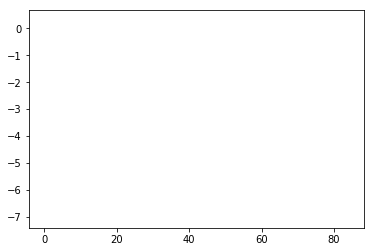

In [56]:
plt.plot(reg_fit.accuracy)

In [21]:
prediction = log_reg.predict(X_test)

In [42]:
accuracy = len(np.where(prediction == y_test)[0])/len(y_test)*100
print('Accuracy:',accuracy)

Accuracy: 92.39956568946796
